In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
from tqdm import tqdm

In [73]:
plt.rcParams['figure.figsize'] = [16, 10]

In [74]:
#df = pd.read_csv('../data/2019_Dec.csv')
df = pd.read_csv('../data/expanded.csv')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533268 entries, 0 to 3533267
Data columns (total 14 columns):
Unnamed: 0      int64
event_time      object
event_type      object
product_id      int64
category_id     int64
brand           object
price           float64
user_id         int64
user_session    object
year            int64
month           int64
day             int64
hour            int64
day_of_week     int64
dtypes: float64(1), int64(9), object(4)
memory usage: 377.4+ MB


#### Data Preprocessing

In [76]:
for col in df.columns:
    print(col, sum(df[col].isna()), np.round(sum(df[col].isna())/ len(df),2))

Unnamed: 0 0 0.0
event_time 0 0.0
event_type 0 0.0
product_id 0 0.0
category_id 0 0.0
brand 0 0.0
price 0 0.0
user_id 0 0.0
user_session 779 0.0
year 0 0.0
month 0 0.0
day 0 0.0
hour 0 0.0
day_of_week 0 0.0


In [77]:
#df = df.drop(['category_code'], axis = 1)

In [78]:
# Fill Brand Null -> NoBrand

noBrandMask = df.brand.isna()
df.loc[noBrandMask, 'brand'] = 'NoBrand'

In [79]:
df.price.describe()

count    3.533268e+06
mean     8.872054e+00
std      1.986454e+01
min      0.000000e+00
25%      2.060000e+00
50%      4.210000e+00
75%      7.140000e+00
max      3.277800e+02
Name: price, dtype: float64

In [80]:
df = df.drop(df.loc[df.price < 0].index, axis = 0)

In [86]:
df.head(5)

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,year,month,day,hour,day_of_week
0,2019-12-01 00:00:00+00:00,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019,12,1,0,6
1,2019-12-01 00:00:00+00:00,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019,12,1,0,6
2,2019-12-01 00:00:02+00:00,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019,12,1,0,6
3,2019-12-01 00:00:05+00:00,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019,12,1,0,6
4,2019-12-01 00:00:07+00:00,view,5824148,1487580005511725929,NoBrand,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019,12,1,0,6


In [87]:
from tqdm._tqdm_notebook import tqdm_notebook

In [88]:
"""
tqdm_notebook.pandas()
df['event_time'] = df['event_time'].progress_apply(lambda x: pd.to_datetime(x))
"""

"\ntqdm_notebook.pandas()\ndf['event_time'] = df['event_time'].progress_apply(lambda x: pd.to_datetime(x))\n"

In [89]:
"""
df['year'] = pd.DatetimeIndex(df['event_time']).year
df['month'] = pd.DatetimeIndex(df['event_time']).month
df['day'] = pd.DatetimeIndex(df['event_time']).day
df['hour'] = pd.DatetimeIndex(df['event_time']).hour
df['day_of_week'] = pd.DatetimeIndex(df['event_time']).dayofweek
"""

"\ndf['year'] = pd.DatetimeIndex(df['event_time']).year\ndf['month'] = pd.DatetimeIndex(df['event_time']).month\ndf['day'] = pd.DatetimeIndex(df['event_time']).day\ndf['hour'] = pd.DatetimeIndex(df['event_time']).hour\ndf['day_of_week'] = pd.DatetimeIndex(df['event_time']).dayofweek\n"

#### Brands

In [90]:
total = sum(df.brand.value_counts())
accumulate = 0
for idx, brand in enumerate(df.brand.value_counts()):
    accumulate += brand
    print(idx, accumulate/total)

0 0.42744309234397165
1 0.49995867848122477
2 0.5440877963403852
3 0.587254066207262
4 0.6226844383160293
5 0.6457209020091315
6 0.667414416342038
7 0.6872077068594853
8 0.7053985149159362
9 0.719658118206714
10 0.733145348725316
11 0.7448928300938394
12 0.7562160583346635
13 0.7666401190059741
14 0.7768776667945936
15 0.7870529492809489
16 0.7959766991917964
17 0.804242418067353
18 0.8124470037370503
19 0.8198285553204568
20 0.8259059318455323
21 0.8313725423602172
22 0.8367502833071253
23 0.8420971746270025
24 0.8472182127141219
25 0.852238777245315
26 0.8571936801850298
27 0.8620373546529728
28 0.8667811216131921
29 0.8710293133722096
30 0.8751133511525307
31 0.8791011607384438
32 0.883080479601321
33 0.8868913991239838
34 0.8905681652226777
35 0.8941979493205724
36 0.8977391468747913
37 0.90110345436576
38 0.9041329443450087
39 0.9070495077078784
40 0.9099606936128253
41 0.9127484810096489
42 0.9154547574653267
43 0.9179422562907767
44 0.9204223964895955
45 0.922778006083886
46 0.9

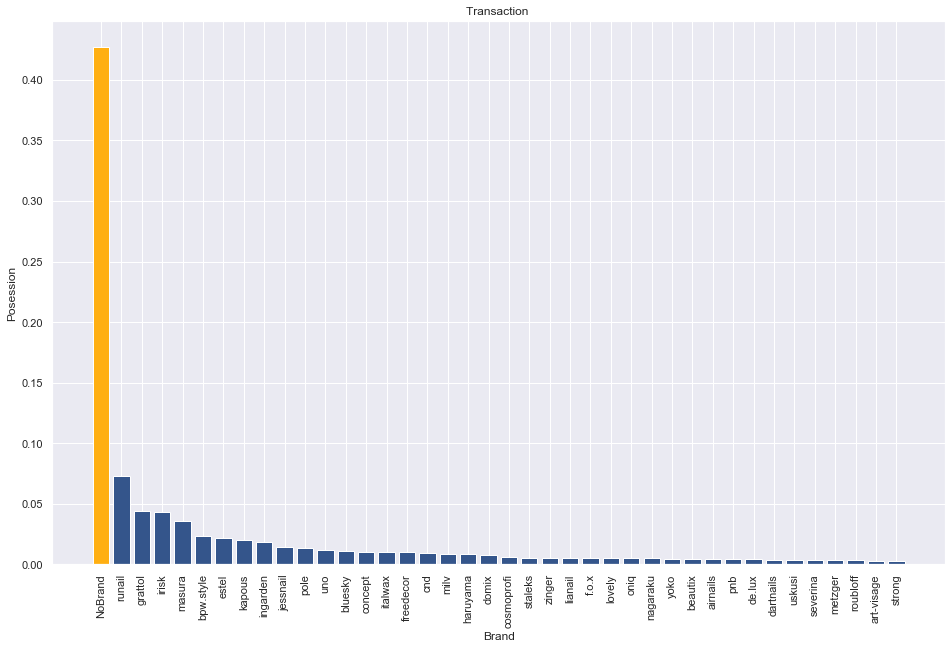

In [91]:
y = df.brand.value_counts(normalize = True)[:40]
x = y.index
colors = tuple('#ffaf12' if idx == 0 else '#34558b' for idx in range(len(y)))

plt.title('Transaction ')
plt.bar(x, y, color = colors)
plt.xticks(rotation = 90)
plt.xlabel('Brand')
plt.ylabel('Posession')
plt.show()

In [92]:
total = sum(df.loc[df.brand != 'NoBrand'].brand.value_counts())
accumulate_count = 0
accumulate_percentage = []
for idx, brand in enumerate(df.loc[df.brand != 'NoBrand'].brand.value_counts()):
    accumulate_count += brand
    accumulate_percentage.append(np.round(accumulate_count / total, 4))

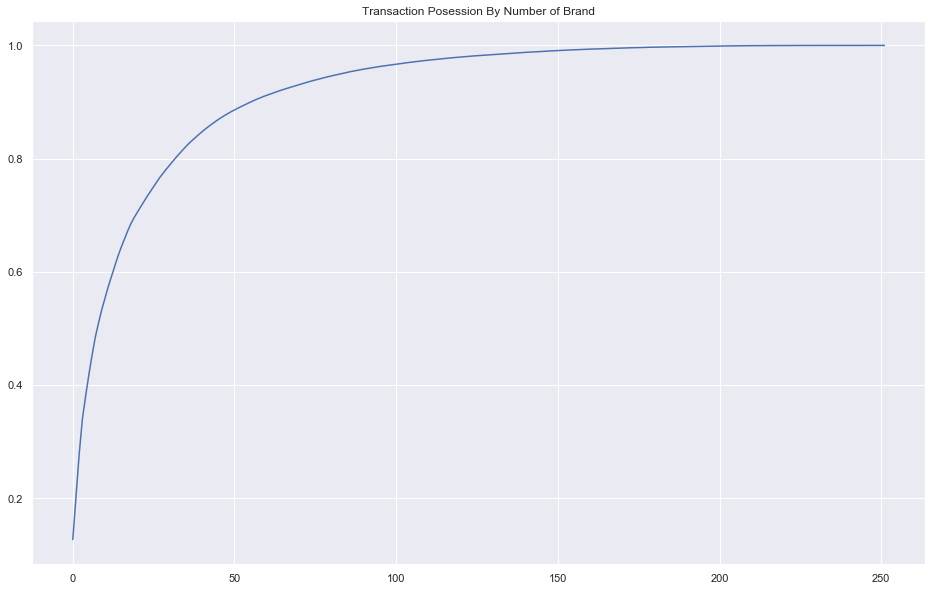

In [93]:
plt.title('Transaction Posession By Number of Brand')
plt.plot(range(0, len(accumulate_percentage)), accumulate_percentage)
plt.show()

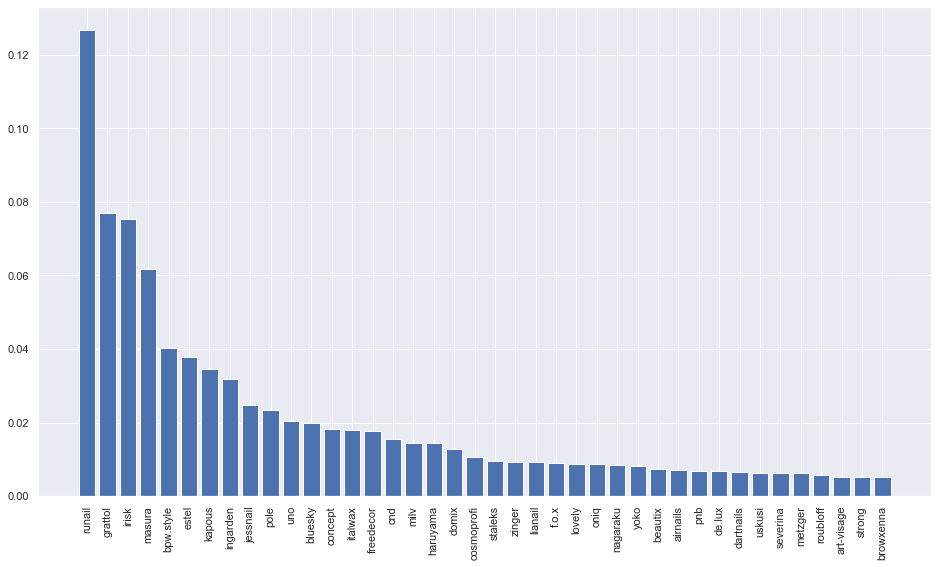

In [94]:
y = df.loc[df.brand != 'NoBrand',:].brand.value_counts(normalize = True)[:40]
x = y.index

plt.figure(figsize=(16,9))
plt.bar(x, y)
plt.xticks(rotation = 90)
plt.show()

In [95]:
# agg('max') -> to determine the price of each product. Better Idea? 
brand_product_price = df.groupby(['brand','product_id'])['price'].agg('max')

In [96]:
dict_bpp = {}
for brand_product in brand_product_price.index:
    
    brand = brand_product[0]
    product = brand_product[1]
    
    dict_bpp[brand] = dict_bpp.get(brand, {})
    dict_bpp[brand][product] = brand_product_price[(brand, product)]

In [97]:
brands = pd.DataFrame()
for brand in dict_bpp.keys():
    array = np.array(list(dict_bpp[brand].values()))
    data = {'items': len(array), 'mean': np.around(np.mean(array), 1), '25%': np.percentile(array, 25),
           '50%': np.percentile(array, 50), '75%': np.percentile(array, 75), 'max': np.max(array), 'min': np.min(array)}
    brands = pd.concat([brands, pd.DataFrame(data = data, index = [brand])])

In [98]:
brands.sort_values(by = ['items'], ascending = False)

,items,mean,25%,50%,75%,max,min
NoBrand,20392,7.0,2.05,4.29,7.46,317.46,0.00
masura,1536,4.1,2.37,3.63,5.54,76.17,0.32
irisk,1468,5.6,1.67,2.54,5.40,144.76,0.16
runail,1313,5.0,1.98,2.62,3.56,184.13,0.00
estel,856,6.2,4.29,5.79,6.75,30.95,0.87
...,...,...,...,...,...,...,...
lunaris,1,23.5,23.48,23.48,23.48,23.48,23.48
macadamia,1,19.0,19.05,19.05,19.05,19.05,19.05
shifei,1,4.7,4.68,4.68,4.68,4.68,4.68
philips,1,3.4,3.43,3.43,3.43,3.43,3.43


검색기준

In [99]:
top_15_brands = df.brand.value_counts(normalize = True)[:15].index

In [100]:
top_15_brands

Index(['NoBrand', 'runail', 'grattol', 'irisk', 'masura', 'bpw.style', 'estel',
       'kapous', 'ingarden', 'jessnail', 'pole', 'uno', 'bluesky', 'concept',
       'italwax'],
      dtype='object')

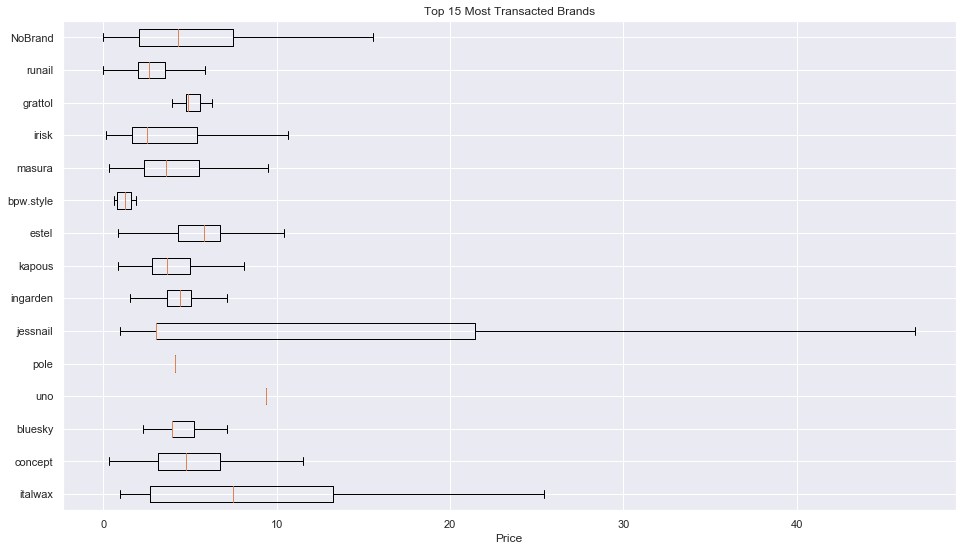

In [101]:
plt.figure(figsize=(16,9))
plt.title('Top 15 Most Transacted Brands')
plt.boxplot([list(dict_bpp[brand].values()) for brand in top_15_brands[::-1]], showfliers = False, vert = False, labels = top_15_brands[::-1])
plt.xlabel('Price')
plt.show()

In [102]:
revenue_by_brand = df.loc[df.event_type == 'purchase', ['brand','price']].groupby('brand').agg(['sum', len, 'mean'])
revenue_by_brand.columns = ['revenue', 'sold', 'average']

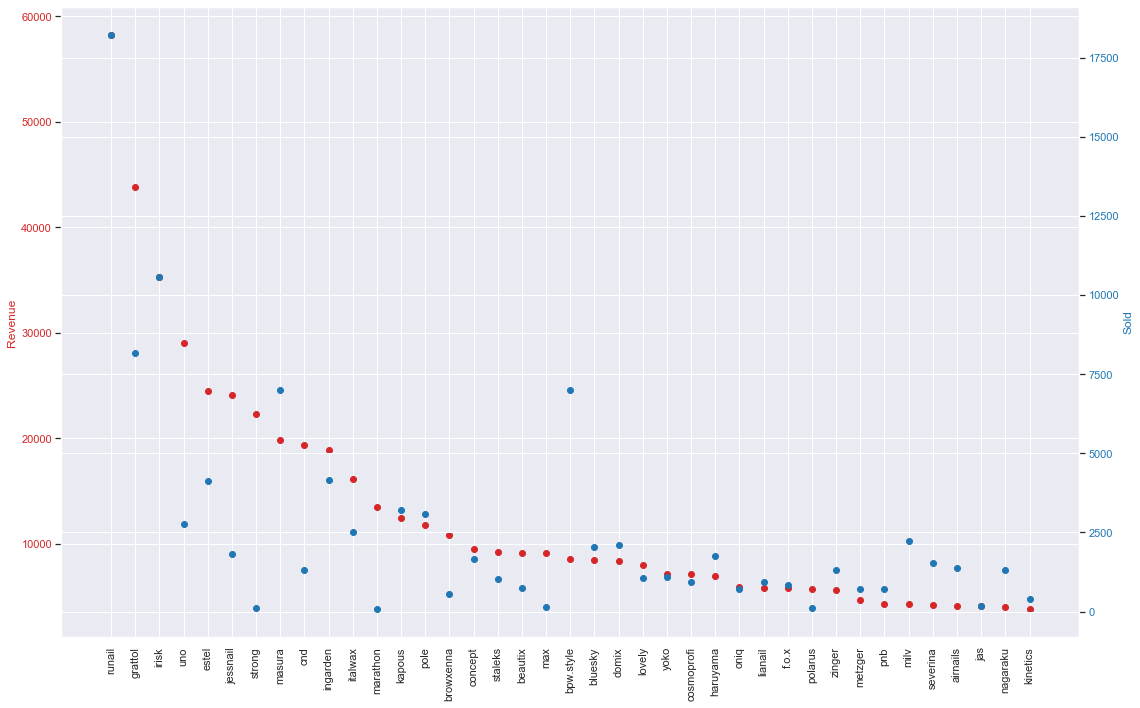

In [103]:
y = revenue_by_brand.sort_values(by = 'revenue', ascending = False)[1:40]
x = y.index

fig, ax1 = plt.subplots()
plt.xticks(rotation = 90)
color = 'tab:red'
ax1.set_ylabel('Revenue', color=color)
ax1.scatter(x, y['revenue'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Sold', color=color)  # we already handled the x-label with ax1
ax2.scatter(x, y['sold'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [104]:
price_count = df.loc[:,['product_id','price']].groupby('product_id').agg('min').price.apply(np.ceil).value_counts()

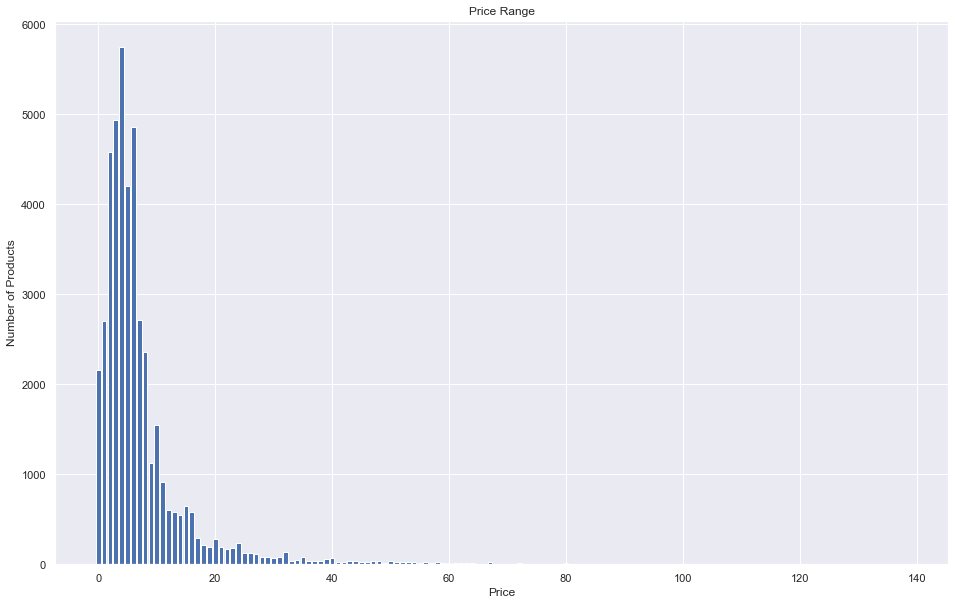

In [105]:
y = price_count[:100]
x = y.index

plt.title('Price Range')
plt.bar(x, y)
plt.xticks()
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.show()

#### Product

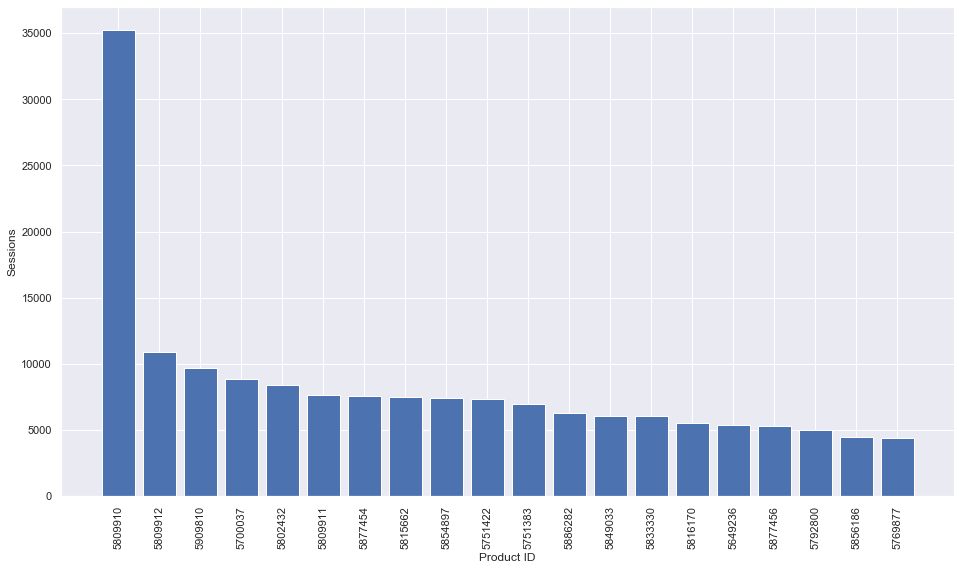

In [106]:
y = df['product_id'].value_counts(ascending = False)[:20]
x = [str(n) for n in y.index]

plt.figure(figsize=(16,9))
plt.bar(x, y)
plt.xticks(rotation = 90)
plt.xlabel('Product ID')
plt.ylabel('Sessions')
plt.show()

In [107]:
df['product_id'].value_counts(ascending = False)[:20].index

Int64Index([5809910, 5809912, 5909810, 5700037, 5802432, 5809911, 5877454,
            5815662, 5854897, 5751422, 5751383, 5886282, 5849033, 5833330,
            5816170, 5649236, 5877456, 5792800, 5856186, 5769877],
           dtype='int64')

In [108]:
product_event = df.groupby(['product_id', 'event_type'])['event_type'].agg(len).unstack()

In [109]:
product_event = product_event.fillna(0)

In [125]:
df['product_id'].value_counts(ascending = False)[:20].index

Int64Index([5809910, 5809912, 5909810, 5700037, 5802432, 5809911, 5877454,
            5815662, 5854897, 5751422, 5751383, 5886282, 5849033, 5833330,
            5816170, 5649236, 5877456, 5792800, 5856186, 5769877],
           dtype='int64')

In [126]:
df.loc[df.event_type == 'purchase', 'product_id'].value_counts()[:20]

5809910    1659
5854897     786
5802432     714
5700037     621
5809912     620
5833330     594
5304        549
5751422     548
5815662     521
5751383     435
5849033     394
5792800     394
5809911     386
5843836     354
5833326     345
5528035     341
5906122     340
5833325     330
5833335     319
5013        294
Name: product_id, dtype: int64

#### By Time

In [127]:
day_of_week = ['S', 'M', 'Tu', 'W', 'Th', 'F', 'S'] * 5
day_of_week = day_of_week[:31]

In [128]:
transactions = df.day.value_counts().sort_index()

In [129]:
transactions_by_day = pd.DataFrame(data = {'transactions' : transactions, 'day_of_week': day_of_week}).reset_index()
transactions_by_day.columns = ['date', 'transactions', 'day_of_week']

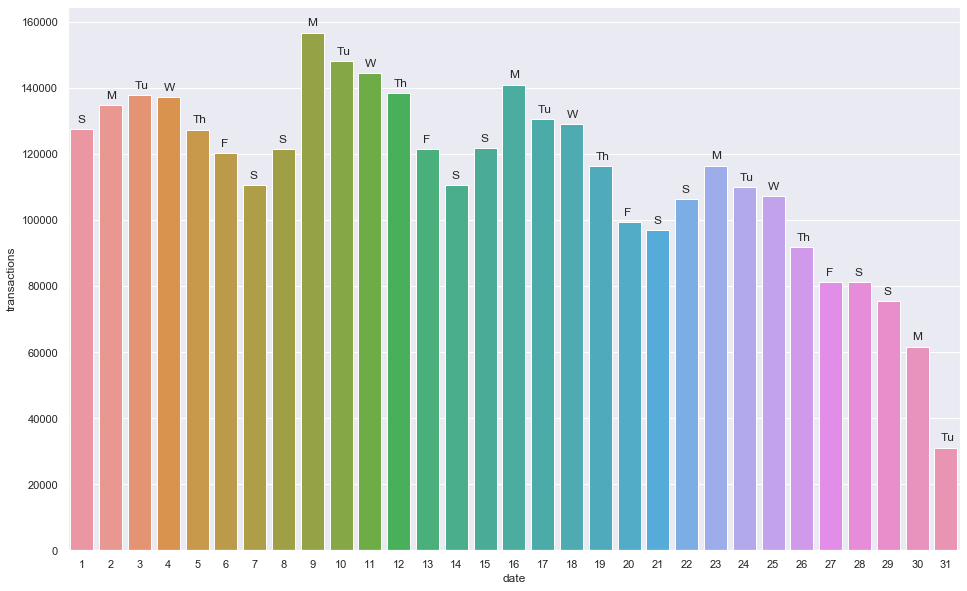

In [130]:
sns.barplot(x = 'date', y = 'transactions', data = transactions_by_day)

# iterrows()
for row in transactions_by_day.iterrows():
    _day = row[0]
    _transactions = row[1]['transactions']
    _day_of_week = row[1]['day_of_week']
    plt.annotate(_day_of_week, xy = (_day - 0.17, _transactions + 2000), fontsize = 12)

plt.show()

In [131]:
day_by_hour = df.groupby(['day_of_week', 'hour'])['event_type'].agg(len).unstack().T
day_by_hour.columns = ['M', 'Tu', 'W', 'Th', 'F', 'S', 'S']

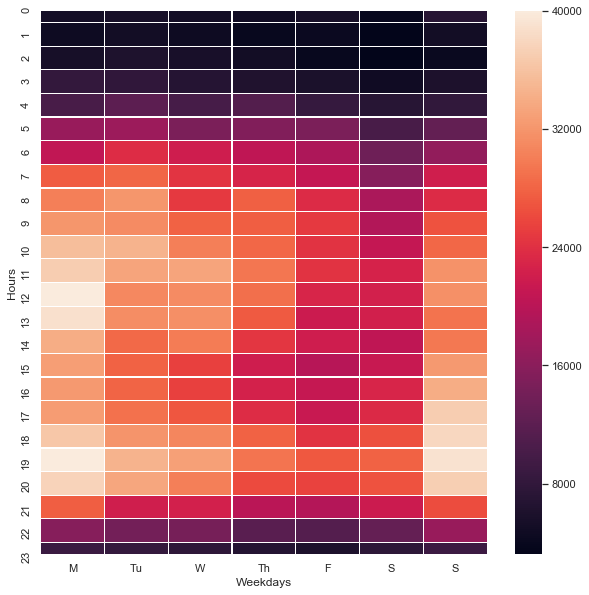

In [132]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(day_by_hour, linewidth = 0.2)
plt.ylabel('Hours')
plt.xlabel('Weekdays')
plt.show()
plt.rcParams['figure.figsize'] = [16, 10]

#### User

In [133]:
purchased_users = df.loc[df.event_type == 'purchase'].user_id.unique()
purchased_users_transactions = df.loc[df.user_id.isin(purchased_users)].sort_values(by = 'user_id')

In [134]:
whole_users = df.user_id.unique()

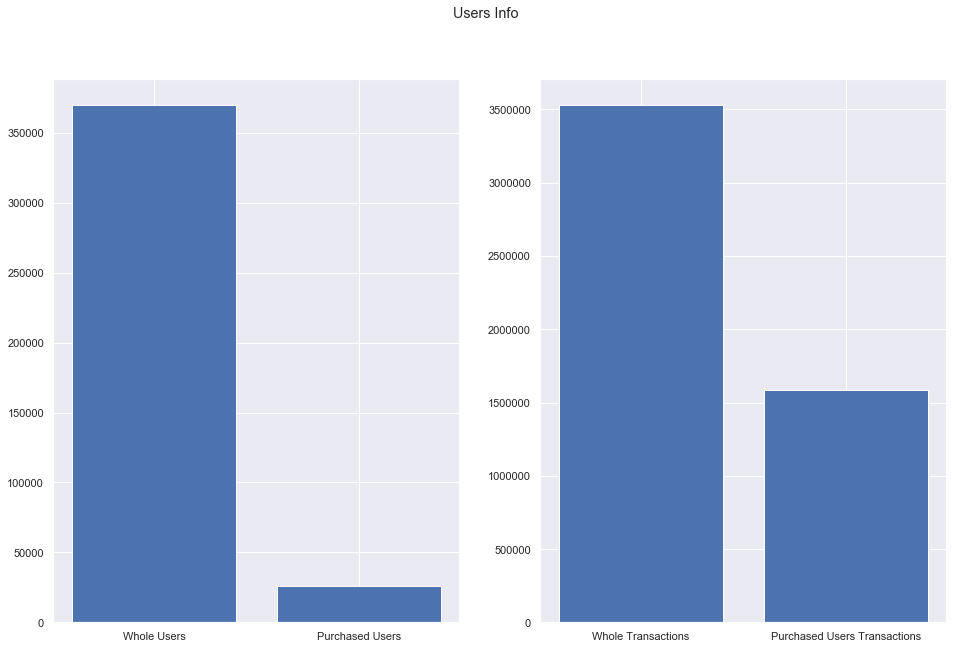

In [135]:
y1 = [len(whole_users), len(purchased_users)]
x1 = ['Whole Users', 'Purchased Users']

y2 = [len(df), len(purchased_users_transactions)]
x2 = ['Whole Transactions', 'Purchased Users Transactions']

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Users Info')
ax1.bar(x1, y1)
ax2.bar(x2, y2)
plt.show()

In [136]:
event_by_purchased_user = purchased_users_transactions[['user_id', 'event_type']].groupby(['user_id', 'event_type']).agg(len).unstack()
event_by_purchased_user = event_by_purchased_user.fillna(0)

In [137]:
event_by_purchased_user.sort_values(by = 'purchase', ascending = False)[:10]

event_type,cart,purchase,remove_from_cart,view
user_id,,,,
575709540,606.0,399.0,60.0,86.0
517825140,535.0,376.0,108.0,67.0
404207391,318.0,204.0,18.0,19.0
572631412,1336.0,199.0,2309.0,39.0
471099630,252.0,190.0,38.0,9.0
586168240,299.0,187.0,135.0,22.0
565156776,263.0,182.0,127.0,65.0
579751441,189.0,171.0,87.0,4.0
571906276,130.0,162.0,39.0,20.0


In [140]:
top_20_frequent_buyer = event_by_purchased_user.sort_values(by = 'purchase', ascending = False)[:5213].index

In [141]:
df.loc[(df.user_id.isin(top_20_frequent_buyer)) & (df.event_type == 'purchase')].price.sum()

467441.31999999995

In [142]:
df.loc[df.event_type == 'purchase'].price.sum()

1078164.53

In [143]:
467441.31/1078164.53

0.4335528548690059

In [144]:
amount_by_purchased_user = purchased_users_transactions[['user_id', 'price']].groupby(['user_id']).agg(len).unstack()

In [145]:
sum(amount_by_purchased_user.sort_values(ascending = False)[:2561])

691920.0

In [61]:
amount_by_purchased_user.sort_values(ascending = False)

       user_id  
price  572631412    3883.0
       467810091    3147.0
       548810441    2426.0
       557616099    2016.0
       460604788    1957.0
                     ...  
       584870268       1.0
       591816177       1.0
       581988942       1.0
       537248790       1.0
       587871467       1.0
Length: 25613, dtype: float64